In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

In [56]:
accepted_data=pd.read_csv('data.csv')
accepted_data.head()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
accepted_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
accepted_data.shape

(2260701, 151)

In [59]:
accepted_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [60]:
accepted_data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.999755,0.999038,0.098082,0.945625,0.197246,0.043542,-0.009277,0.110585,...,NaN,0.714632,NaN,0.048720,0.713146,0.850253,0.489645,0.802467,-0.059011,0.220636
funded_amnt,NaN,0.999755,1.000000,0.999341,0.098097,0.945967,0.197207,0.043745,-0.009173,0.110164,...,NaN,0.714632,NaN,0.048720,0.713146,0.850253,0.489645,0.802567,-0.058842,0.221233
funded_amnt_inv,NaN,0.999038,0.999341,1.000000,0.098129,0.945118,0.197025,0.044276,-0.009029,0.109871,...,NaN,0.714582,NaN,0.048644,0.713096,0.850263,0.489672,0.802240,-0.059208,0.221910
int_rate,NaN,0.098082,0.098097,0.098129,1.000000,0.123949,-0.050583,0.124491,0.058909,-0.415995,...,NaN,0.620643,NaN,0.089677,0.610623,0.268128,0.208877,0.310976,-0.012881,0.113606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,NaN,0.850253,0.850253,0.850263,0.268128,0.759656,0.370614,0.027320,-0.010605,0.130649,...,NaN,0.880939,NaN,-0.005152,0.879497,1.000000,0.480569,0.947424,-0.005720,0.309005
hardship_last_payment_amount,NaN,0.489645,0.489645,0.489672,0.208877,0.464442,0.211987,0.019685,0.000153,0.029815,...,NaN,0.432668,NaN,0.066027,0.436469,0.480569,1.000000,0.493082,0.043391,0.154815
settlement_amount,NaN,0.802467,0.802567,0.802240,0.310976,0.735696,0.165107,0.043349,0.007069,0.082600,...,NaN,0.876960,NaN,0.057426,0.864146,0.947424,0.493082,1.000000,0.195247,0.259616
settlement_percentage,NaN,-0.059011,-0.058842,-0.059208,-0.012881,-0.045260,-0.006011,0.006131,0.006216,0.027031,...,NaN,0.034846,NaN,-0.001037,-0.003705,-0.005720,0.043391,0.195247,1.000000,0.063345


In [61]:
missing_values_count=accepted_data.isnull().sum()
missing_values_count

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [62]:
#calculating percent of data missing in each column
percent_missing=(accepted_data.isnull().sum()/accepted_data.shape[0])*100
percent_missing

id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64

No handles with labels found to put in legend.


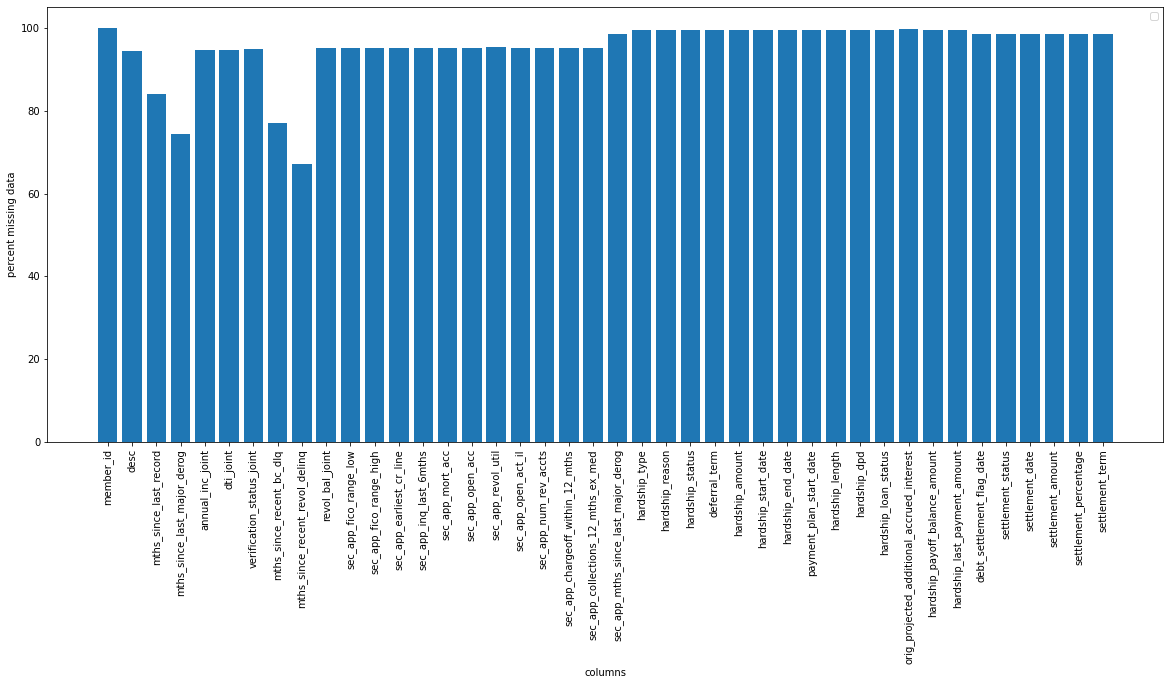

In [63]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
percent_missing_morethan60=percent_missing[percent_missing>60]
percent_missing_morethan60.index
plt.bar(x=percent_missing_morethan60.index,height=percent_missing_morethan60)
plt.xlabel('columns')
plt.ylabel('percent missing data')
plt.legend()
plt.show()

In [64]:
drop_columns=list(percent_missing[percent_missing>60].index)
drop_columns

['member_id',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settle

In [65]:
accepted_data.drop(labels=drop_columns,axis=1,inplace=True)

In [66]:
accepted_data.shape

(2260701, 109)

In [67]:
numerical_columns=accepted_data.select_dtypes(include=np.number).columns

In [68]:
numerical_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'de

In [69]:
accepted_data.select_dtypes(include='object').columns

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [70]:
accepted_data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [71]:
accepted_data.isnull().any()

id                            False
loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
term                           True
                              ...  
total_bc_limit                 True
total_il_high_credit_limit     True
hardship_flag                  True
disbursement_method            True
debt_settlement_flag           True
Length: 109, dtype: bool

In [72]:
percent_missing=(accepted_data.isnull().sum()/accepted_data.shape[0])*100

In [73]:
percent_missing.sort_values(ascending=False)

next_pymnt_d              59.509993
mths_since_last_delinq    51.246715
il_util                   47.281042
mths_since_rcnt_il        40.251099
all_util                  38.323555
                            ...    
out_prncp_inv              0.001460
out_prncp                  0.001460
initial_list_status        0.001460
revol_bal                  0.001460
id                         0.000000
Length: 109, dtype: float64

In [74]:
labelEncoder = LabelEncoder()

In [102]:
accepted_data['loan_amnt']=accepted_data['loan_amnt'].fillna(0)

In [103]:
accepted_data['int_rate']=accepted_data['int_rate'].fillna(0)

In [104]:
accepted_data['annual_inc']=accepted_data['annual_inc'].fillna(0)

In [75]:
accepted_data['loan_status']=accepted_data['loan_status'].fillna('0')

In [76]:
accepted_data['loan_status']

0           Fully Paid
1           Fully Paid
2           Fully Paid
3              Current
4           Fully Paid
              ...     
2260696        Current
2260697    Charged Off
2260698        Current
2260699              0
2260700              0
Name: loan_status, Length: 2260701, dtype: object

In [77]:
accepted_data['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', '0',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [78]:
accepted_data['loan_status_cat']=labelEncoder.fit_transform(accepted_data['loan_status'])

In [79]:
accepted_data[['loan_status','loan_status_cat']].value_counts()

loan_status                                          loan_status_cat
Fully Paid                                           6                  1076751
Current                                              2                   878317
Charged Off                                          1                   268559
Late (31-120 days)                                   9                    21467
In Grace Period                                      7                     8436
Late (16-30 days)                                    8                     4349
Does not meet the credit policy. Status:Fully Paid   5                     1988
Does not meet the credit policy. Status:Charged Off  4                      761
Default                                              3                       40
0                                                    0                       33
dtype: int64

In [80]:
accepted_data['grade']=accepted_data['grade'].fillna('0')

In [81]:
accepted_data['grade_cat']=labelEncoder.fit_transform(accepted_data['grade'])

In [82]:
accepted_data[['grade_cat','grade']].value_counts()

grade_cat  grade
2          B        663557
3          C        650053
1          A        433027
4          D        324424
5          E        135639
6          F         41800
7          G         12168
0          0            33
dtype: int64

In [83]:
accepted_data['term']=accepted_data['term'].fillna('0')

In [84]:
accepted_data['term_cat']=labelEncoder.fit_transform(accepted_data['term'])

In [85]:
accepted_data[['term_cat','term']].value_counts()

term_cat  term      
0          36 months    1609754
1          60 months     650914
2         0                  33
dtype: int64

In [86]:
#data modeling

In [87]:
from sklearn.model_selection import train_test_split

In [118]:
X=accepted_data[['loan_amnt','annual_inc','int_rate','term_cat','grade_cat']]

In [119]:
y=accepted_data['loan_status_cat']

In [120]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [121]:
X_train

,loan_amnt,annual_inc,int_rate,term_cat,grade_cat
826286,6000.0,80000.0,10.47,0,2
637138,8000.0,75000.0,10.91,0,2
160747,28000.0,250000.0,6.24,0,1
464514,16000.0,48000.0,12.61,1,3
1199924,17500.0,75000.0,12.49,0,2
...,...,...,...,...,...
1298045,12000.0,82000.0,8.90,0,1
1016907,9600.0,55000.0,14.46,0,3
2137480,25000.0,140000.0,14.08,0,3
333298,13600.0,39500.0,18.25,1,5


In [122]:
y_train

826286     2
637138     2
160747     6
464514     2
1199924    6
          ..
1298045    6
1016907    6
2137480    2
333298     6
33622      1
Name: loan_status_cat, Length: 1695525, dtype: int32

In [94]:
#X_train.to_csv("C:/Users/Asus/Demo/Logistic_X_train.csv")
#y_train.to_csv("C:/Users/Asus/Demo/Logistic_y_train.csv")

# Scaling the input train and test data using StandardScaler

In [128]:
X_test=X_test.head(1000)

In [129]:
X_test.shape

(1000, 5)

In [126]:
X_train=X_train.head(10000)

In [127]:
X_train.shape

(10000, 5)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
model=LogisticRegression(random_state=0,max_iter=10000)

In [130]:
y_train=y_train.head(10000)

In [131]:
y_train.shape

(10000,)

In [132]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [133]:
y_pred=model.predict(X_test)

In [ ]:
#testing the accuracy of the model

In [137]:
model.score(X_test, y_pred)

1.0

In [ ]:
# Hence, we can say that our logistic regression model is quite accurate.

In [138]:
import pickle

In [139]:
pickle.dump(model, open("loan.pkl",'wb'))